In [1]:
from glob import glob
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as T
from PIL import Image
import copy
from itertools import product
from astropy.visualization import simple_norm
import astropy.io.fits as fits
import cv2

In [2]:
def visualize_syn_data(data,nrow,ncol):
    _, axes = plt.subplots(nrows=nrow,ncols=ncol,figsize=(20,20))

    for i, (row,col) in enumerate(product(range(nrow),range(ncol))):
    
        
        axes[row][col].imshow(data[i],cmap='gray',clim=(0,255))
        #axes[row][col].add_artist(star_circle)
        #axes[row][col].add_artist(exo_circle)
        axes[row][col].set_yticks([])
        axes[row][col].set_xticks([])
        
    _.patch.set_facecolor('#423f3b')
    plt.subplots_adjust(wspace=0,hspace=0)
    plt.show()  

In [3]:
#directory = f'/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/'
directory = f'/data/scratch/bariskurtkaya/dataset/NIRCAM/'
h5_files = glob(os.path.join(directory,'**/*sci.h5'))

In [4]:
h5_files

['/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/1386__psfstack_sci.h5',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1441/1441__psfstack_sci.h5']

In [5]:
dir_1441 = [x for x in h5_files if '1441' in x]
data_1441 = h5py.File(h5_files[0],'r')

dir_1386 = [x for x in h5_files if '1386' in x]
data_1386 = h5py.File(dir_1386[0],'r')

In [6]:
keys_1386 = [x for x in data_1386.keys()]
hip68245_f250m_335r_1386 = np.array(data_1386[keys_1386[0]])
hip68245_f300m_335r_1386 = np.array(data_1386[keys_1386[1]])
hip68245_f356w_335r_1386 = np.array(data_1386[keys_1386[2]])
hip68245_f410m_335r_1386 = np.array(data_1386[keys_1386[3]])
hip68245_f444w_335r_1386 = np.array(data_1386[keys_1386[4]])

In [7]:
psfs = glob('/data/scratch/bariskurtkaya/PSF_MODELS/*.fits')

In [8]:
for _, data_dir in enumerate(psfs):
    if 'F250' in data_dir:
        f250m = np.squeeze(fits.open(data_dir)[0].data)
    elif 'F300' in data_dir:
        f300m = np.squeeze(fits.open(data_dir)[0].data)
    elif 'F356' in data_dir:
        f356w = np.squeeze(fits.open(data_dir)[0].data)
    elif 'F410' in data_dir:
        f410m = np.squeeze(fits.open(data_dir)[0].data)
    elif 'F444' in data_dir:
        f444w = np.squeeze(fits.open(data_dir)[0].data)
    else:
        raise Exception(f'Wavelength doesn\'t contained in dataset')


In [9]:
'PSF',  {'shape': f250m.shape, 'max': np.max(f250m), 'min': np.min(f250m), 'type':f250m.dtype}, 'f250 hip68245', {'shape': hip68245_f250m_335r_1386.shape, 'max': np.max(hip68245_f250m_335r_1386), 'min': np.min(hip68245_f250m_335r_1386), 'type':hip68245_f250m_335r_1386.dtype}

('PSF',
 {'shape': (640, 640),
  'max': 0.27984779442352625,
  'min': 2.4989290634449623e-10,
  'type': dtype('>f8')},
 'f250 hip68245',
 {'shape': (36, 320, 320),
  'max': 13618.118,
  'min': -265.28702,
  'type': dtype('>f4')})

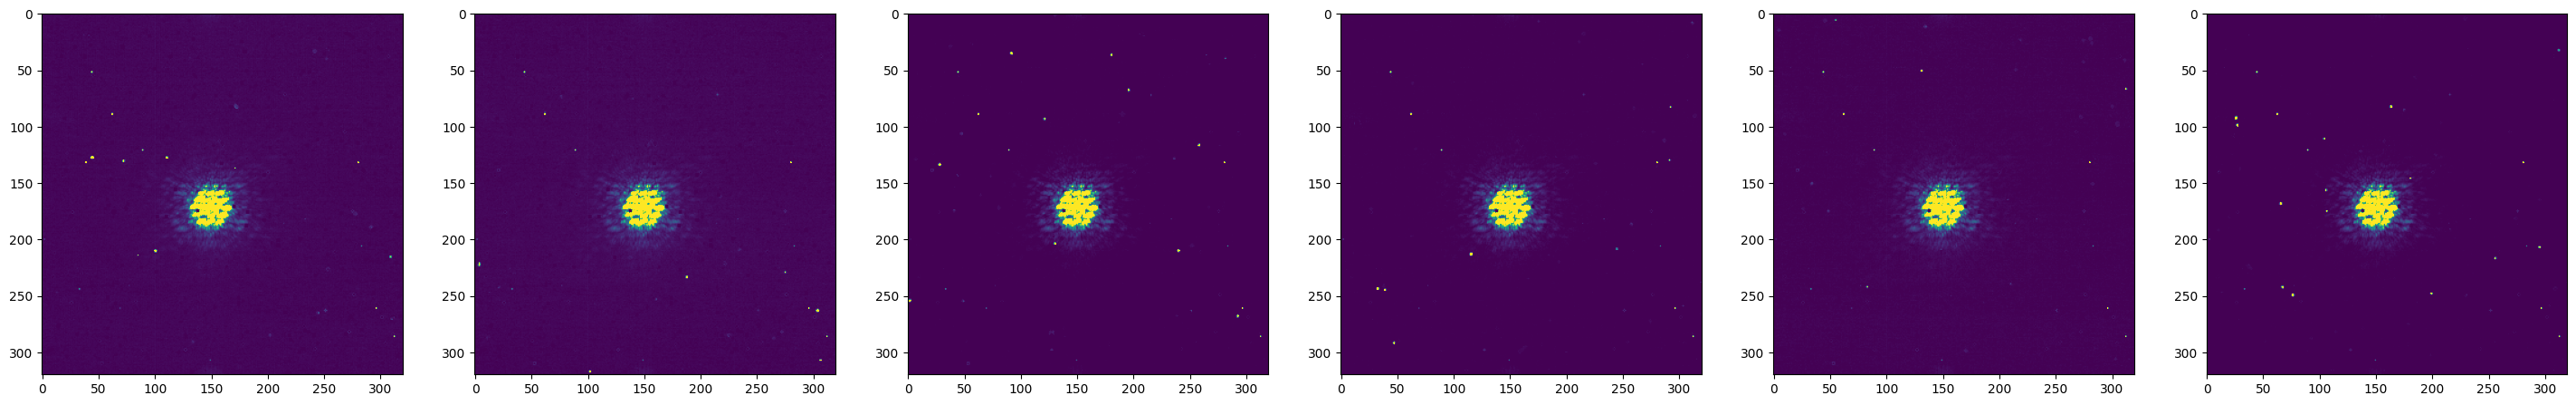

In [10]:
plt.figure(figsize=(36,36))


plt.subplot(1,6,1)
plt.imshow(hip68245_f250m_335r_1386[0], clim = (0,255))

plt.subplot(1,6,2)
plt.imshow(hip68245_f250m_335r_1386[1], clim = (0,255))

plt.subplot(1,6,3)
plt.imshow(hip68245_f250m_335r_1386[2], clim = (0,255))

plt.subplot(1,6,4)
plt.imshow(hip68245_f250m_335r_1386[3], clim = (0,255))

plt.subplot(1,6,5)
plt.imshow(hip68245_f250m_335r_1386[4], clim = (0,255))

plt.subplot(1,6,6)
plt.imshow(hip68245_f250m_335r_1386[5], clim = (0,255))

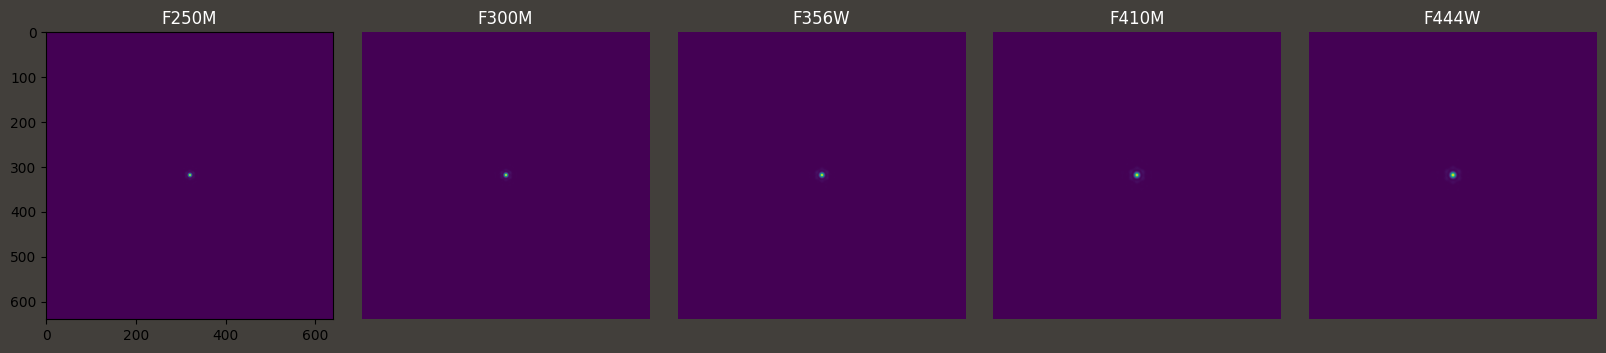

In [11]:
"""
f250m = np.squeeze(fits.open(psfs[3])[0].data)
f300m = np.squeeze(fits.open(psfs[5])[0].data)
f356w = np.squeeze(fits.open(psfs[1])[0].data)
f410m = np.squeeze(fits.open(psfs[0])[0].data)
f444w = np.squeeze(fits.open(psfs[4])[0].data)
"""

fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(1,5,hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

axs[0].set_title('F250M',color='white')
axs[0].imshow(f250m)


axs[1].set_title('F300M',color='white')
axs[1].imshow(f300m)
axs[1].axis('off')


axs[2].set_title('F356W',color='white')
axs[2].imshow(f356w)
axs[2].axis('off')


axs[3].set_title('F410M',color='white')
axs[3].imshow(f410m)
axs[3].axis('off')


axs[4].set_title('F444W',color='white')
axs[4].imshow(f444w)
axs[4].axis('off');

fig.patch.set_facecolor('#423f3b')
plt.subplots_adjust(wspace=0.1,hspace=0)


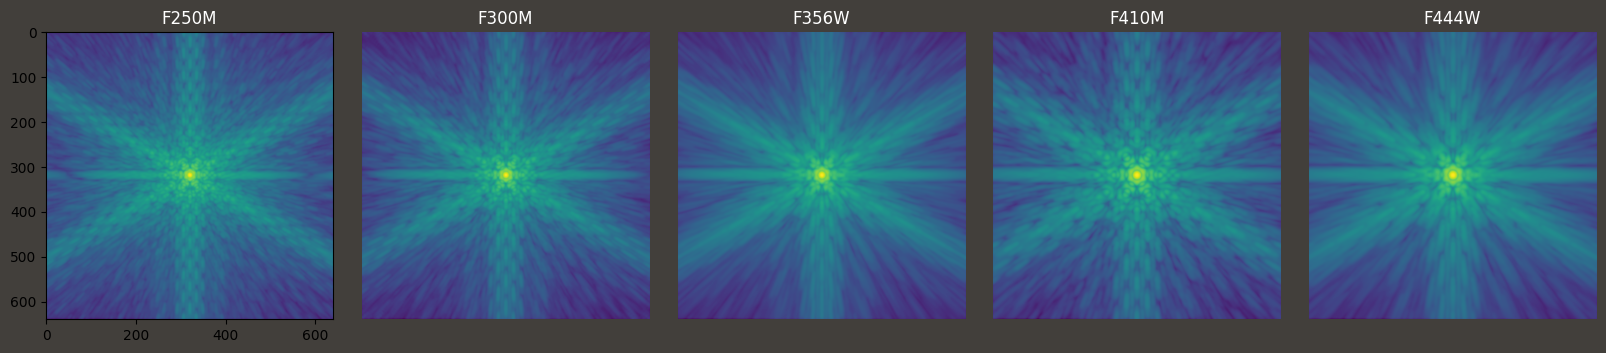

In [18]:
f250m_log = np.log(f250m)
f300m_log = np.log(f300m)
f356w_log = np.log(f356w)
f410m_log = np.log(f410m)
f444w_log = np.log(f444w)


fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(1,5)
axs = gs.subplots()

axs[0].set_title('F250M',color='white')
axs[0].imshow(f250m_log)


axs[1].set_title('F300M',color='white')
axs[1].imshow(f300m_log)
axs[1].axis('off')


axs[2].set_title('F356W',color='white')
axs[2].imshow(f356w_log)
axs[2].axis('off')


axs[3].set_title('F410M',color='white')
axs[3].imshow(f410m_log)
axs[3].axis('off')


axs[4].set_title('F444W',color='white')
axs[4].imshow(f444w_log)
axs[4].axis('off');

fig.patch.set_facecolor('#423f3b')
plt.subplots_adjust(wspace=0.1)

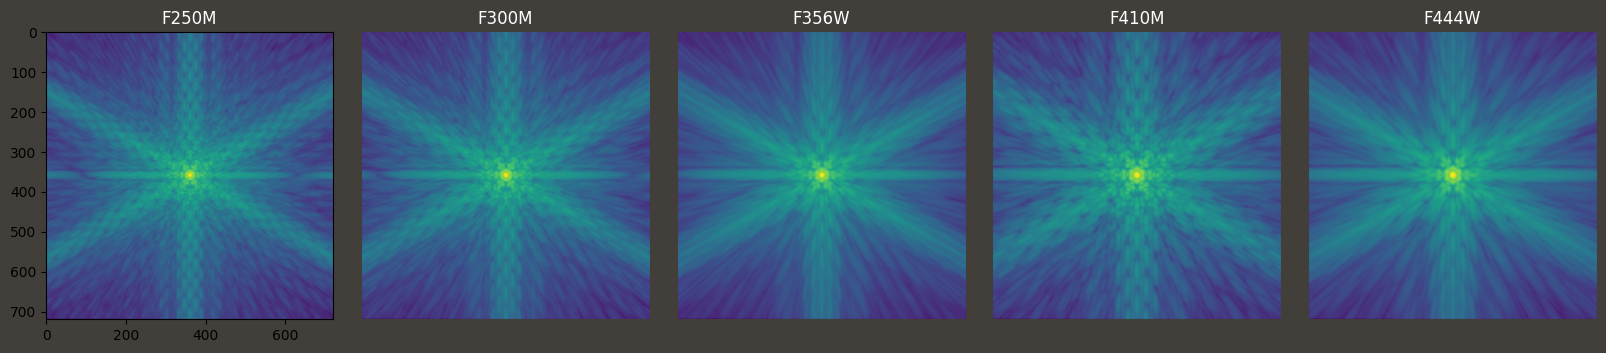

In [28]:
scaled_f250m = ((f250m_log - f250m_log.min()) * (1/(f250m_log.max() - f250m_log.min()) * 200)).astype('uint8')
scaled_f300m = ((f300m_log - f300m_log.min()) * (1/(f300m_log.max() - f300m_log.min()) * 200)).astype('uint8')
scaled_f356w = ((f356w_log - f356w_log.min()) * (1/(f356w_log.max() - f356w_log.min()) * 200)).astype('uint8')
scaled_f410m = ((f410m_log - f410m_log.min()) * (1/(f410m_log.max() - f410m_log.min()) * 200)).astype('uint8')
scaled_f444w = ((f444w_log - f444w_log.min()) * (1/(f444w_log.max() - f444w_log.min()) * 200)).astype('uint8')


fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(1,5,hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

axs[0].set_title('F250M',color='white')
axs[0].imshow(scaled_f250m)


axs[1].set_title('F300M',color='white')
axs[1].imshow(scaled_f300m)
axs[1].axis('off')


axs[2].set_title('F356W',color='white')
axs[2].imshow(scaled_f356w)
axs[2].axis('off')


axs[3].set_title('F410M',color='white')
axs[3].imshow(scaled_f410m)
axs[3].axis('off')


axs[4].set_title('F444W',color='white')
axs[4].imshow(scaled_f444w)
axs[4].axis('off');

fig.patch.set_facecolor('#423f3b')
plt.subplots_adjust(wspace=0.1,hspace=0)

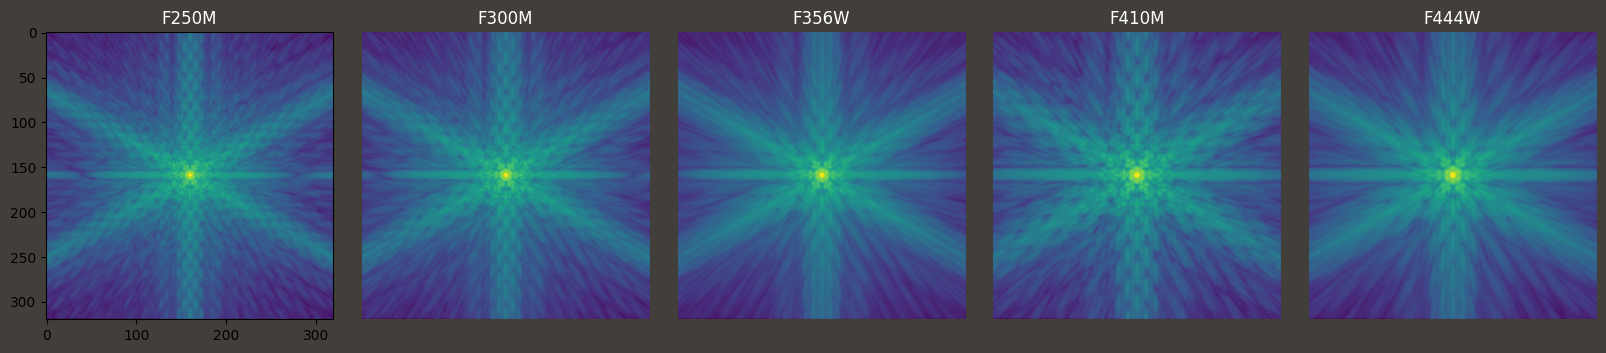

In [33]:
resize_f250m = cv2.resize(scaled_f250m,dsize=(320,320))
resize_f300m = cv2.resize(scaled_f300m,dsize=(320,320))
resize_f356w = cv2.resize(scaled_f356w,dsize=(320,320))
resize_f410m = cv2.resize(scaled_f410m,dsize=(320,320))
resize_f444w = cv2.resize(scaled_f444w,dsize=(320,320))


fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(1,5,hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

axs[0].set_title('F250M',color='white')
axs[0].imshow(resize_f250m)


axs[1].set_title('F300M',color='white')
axs[1].imshow(resize_f300m)
axs[1].axis('off')


axs[2].set_title('F356W',color='white')
axs[2].imshow(resize_f356w)
axs[2].axis('off')


axs[3].set_title('F410M',color='white')
axs[3].imshow(resize_f410m)
axs[3].axis('off')


axs[4].set_title('F444W',color='white')
axs[4].imshow(resize_f444w)
axs[4].axis('off');

fig.patch.set_facecolor('#423f3b')
plt.subplots_adjust(wspace=0.1,hspace=0)

In [34]:
samples = copy.deepcopy(hip68245_f250m_335r_1386)
sample1 = samples[0:6]

In [35]:
sample2 = samples[6:7][0]

ValueError: could not broadcast input array from shape (720,720) into shape (1,44,44)

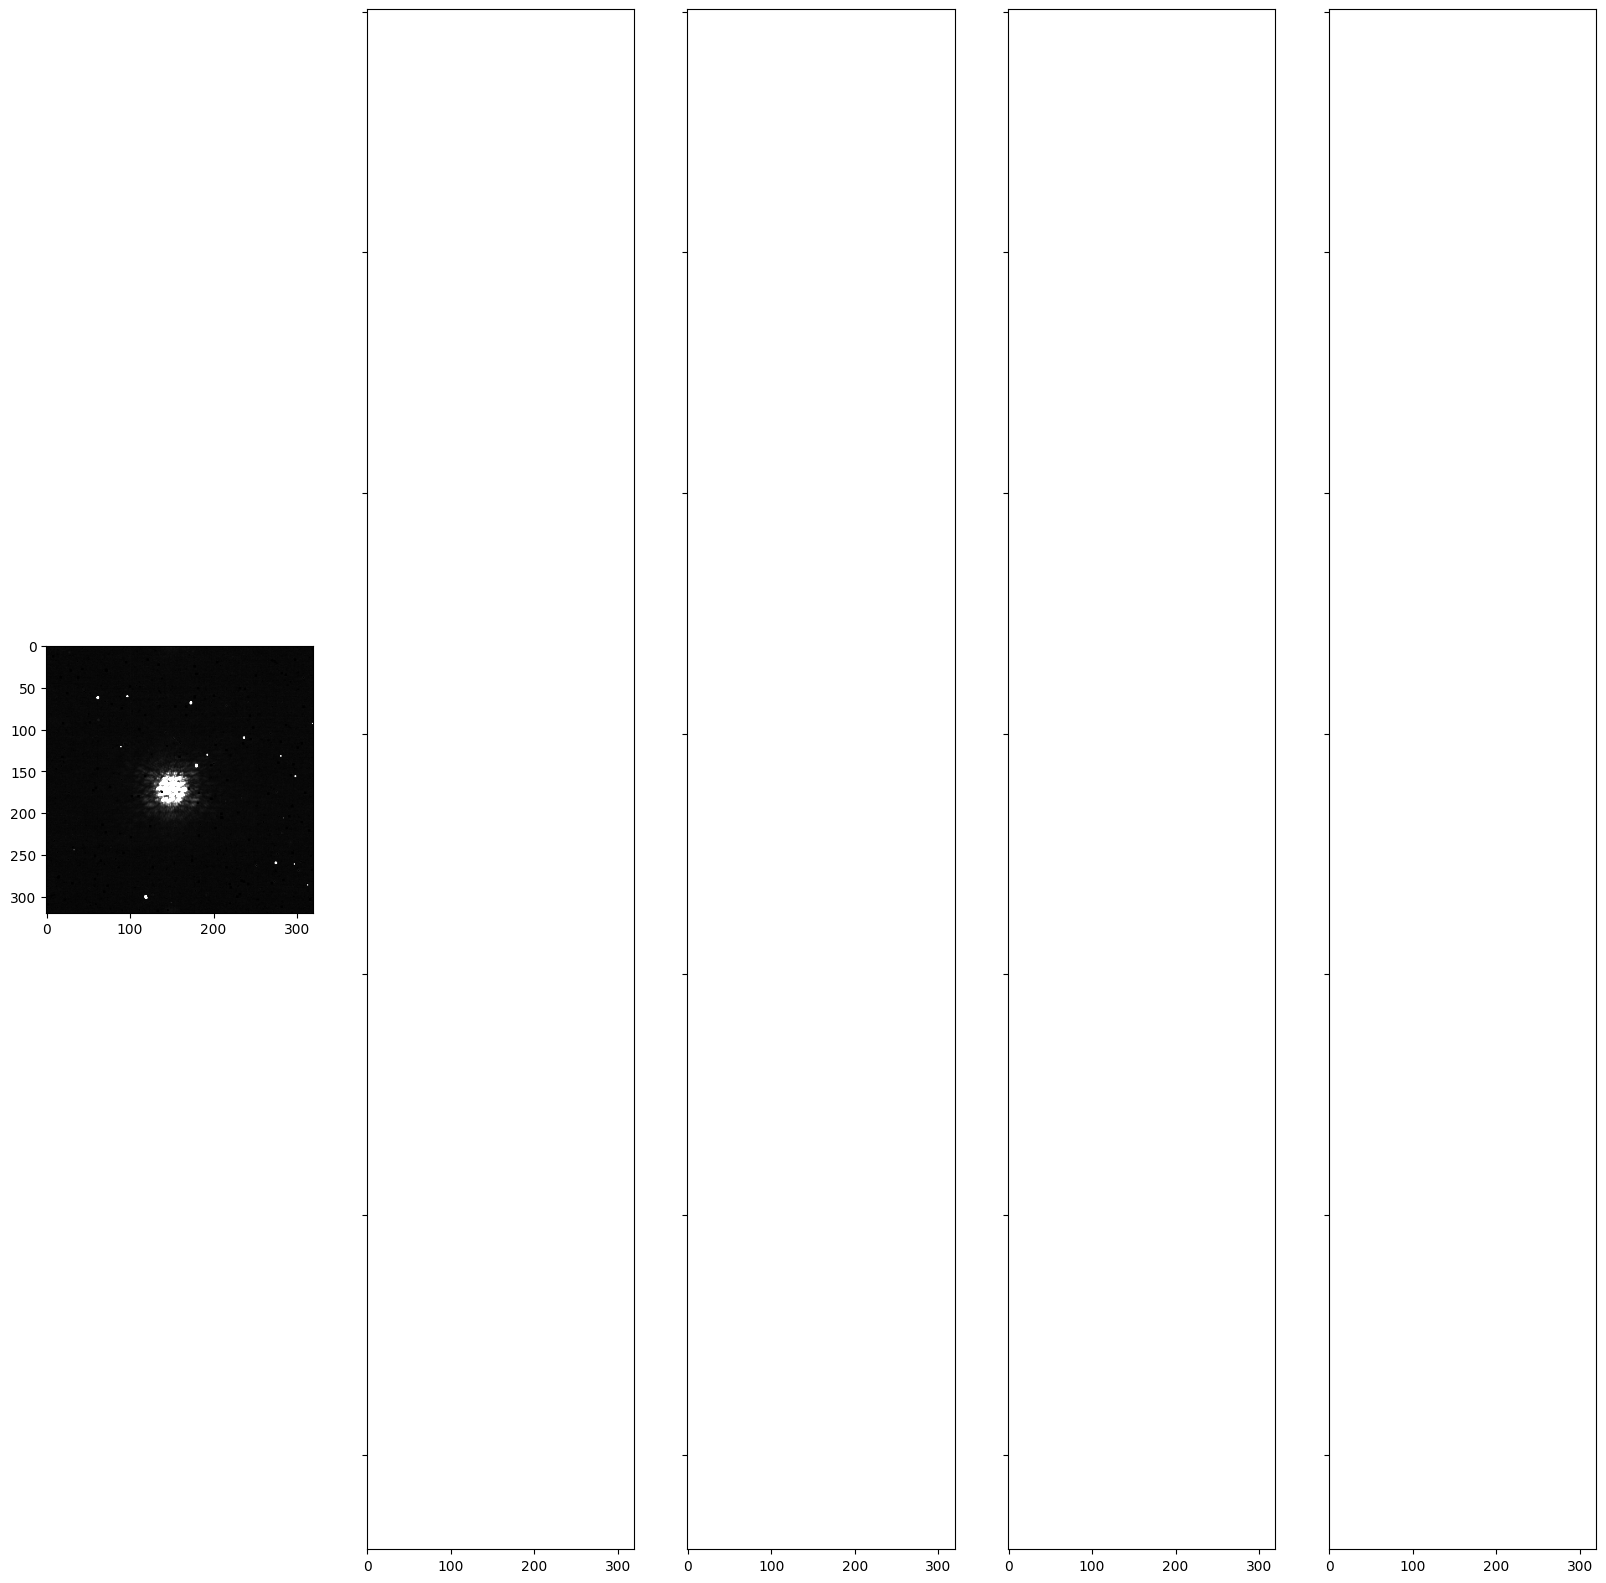

In [36]:
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(1,5,hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

x,y = 40,40

axs[0].set_title('Original',color='white')
axs[0].imshow(sample1[0],clim=(0,255),cmap='gray')


sample1[1:2,y:y+44,x:x+44] = f250m
axs[1].set_title('F250M ',color='white')
axs[1].imshow(sample1[1:2][0],clim=(0,255),cmap='gray')
axs[1].axis('off')

sample1[2:3,y:y+44,x:x+44] = f250m_log
axs[2].set_title('Log F250M ',color='white')
axs[2].imshow(sample1[2:3][0],clim=(0,255),cmap='gray')
axs[2].axis('off')


sample1[3:4,y:y+44,x:x+44] = scaled_f250m
axs[3].set_title('Scaled_Log F250M',color='white')
axs[3].imshow(sample1[3:4][0],clim=(0,255),cmap='gray')
axs[3].axis('off')


sample1[4:5,y:y+6,x:x+6] = resize_f250m
axs[4].set_title('Resized F250M',color='white')
axs[4].imshow(sample1[4:5][0],clim=(0,255),cmap='gray')
axs[4].axis('off');

fig.patch.set_facecolor('#423f3b')
plt.subplots_adjust(wspace=0.1,hspace=0)

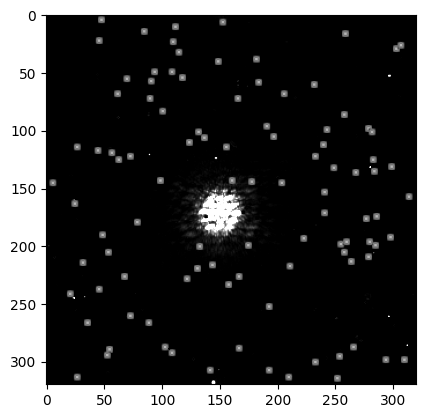

In [14]:
for i in range(100):

    x,y = np.random.sample(size=(2,1))*314
    x,y = int(np.abs(x)),int(np.abs(y))
    #print(x,y)

    sample2[y:y+6,x:x+6] = resize_f250m
    #sample1[y1:y1+44,x1:x1+44] = scaled_f250m2


figure, axes = plt.subplots()
axes.set_aspect(1)
axes.imshow(sample2,cmap='gray',clim=(0,255))
    #axes.add_artist(star_circle)
    #axes.add_artist(exo_circle)
plt.show()